In [1]:
#!pip install --upgrade pandas

In [2]:
#Importation des librairies

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

# Masquer les alertes
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Mall_Customers.csv', sep = ',', decimal='.')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### La segmentation se fera seulement sur la base des revenus

In [5]:
df_revenue = df[['CustomerID','Annual Income (k$)']]

In [6]:
df_revenue

,CustomerID,Annual Income (k$)
0,1,15
1,2,15
2,3,16
3,4,16
4,5,17
...,...,...
195,196,120
196,197,126
197,198,126
198,199,137


#### Visualisons la distribution des données des revenus annuels des clients

In [7]:
df_revenue.describe()

,CustomerID,Annual Income (k$)
count,200.000000,200.000000
mean,100.500000,60.560000
std,57.879185,26.264721
min,1.000000,15.000000
25%,50.750000,41.500000
50%,100.500000,61.500000
75%,150.250000,78.000000
max,200.000000,137.000000


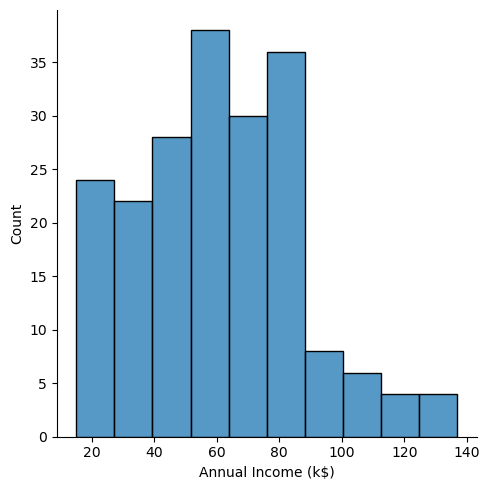

In [8]:
sns.displot(df_revenue['Annual Income (k$)'])

<Axes: ylabel='Annual Income (k$)'>

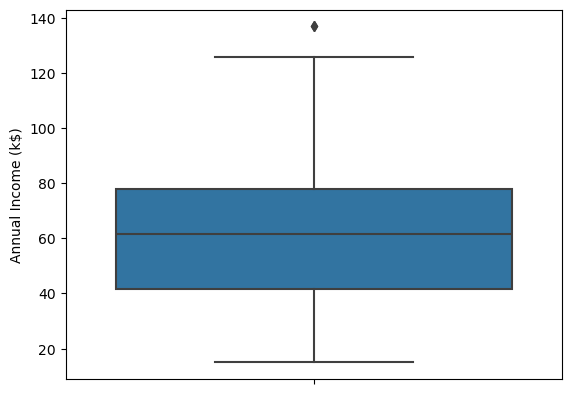

In [9]:
sns.boxplot(y = 'Annual Income (k$)', data = df_revenue)

### Formons les Clusters 

In [10]:
df_revenue = df[['Annual Income (k$)']]
df_revenue

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17
...,...
195,120
196,126
197,126
198,137


In [11]:
from sklearn.cluster import KMeans

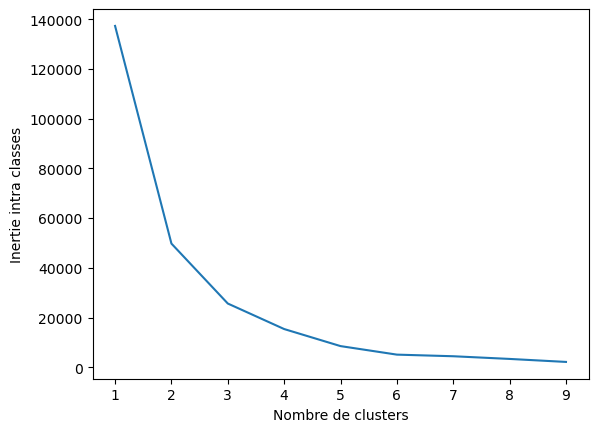

In [12]:
sse={}

for k in range(1,10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(df_revenue)
    df_revenue['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie intra classes")
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(df[['Annual Income (k$)']])
df['IncomeCluster'] = kmeans.predict(df[['Annual Income (k$)']])

In [14]:
#import sklearn 
#print(sklearn.__version__)

In [15]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 66.4       ]
 [ 92.2       ]
 [ 33.02777778]
 [124.        ]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3]


In [16]:
#Ordonner les clusters
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [17]:
df = order_cluster('IncomeCluster','Annual Income (k$)', df, True)

### Statistiques descriptives sur les revenus selon les clusters

In [18]:
df.groupby('IncomeCluster')['Annual Income (k$)'].describe()

,count,mean,std,min,25%,50%,75%,max
IncomeCluster,,,,,,,,
0,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
1,90.0,66.400000,8.581139,50.0,60.00,65.0,74.00,79.0
2,30.0,92.200000,7.174668,81.0,87.00,88.0,98.75,103.0
3,8.0,124.000000,9.411239,113.0,118.25,123.0,128.75,137.0


<Axes: xlabel='IncomeCluster', ylabel='Density'>

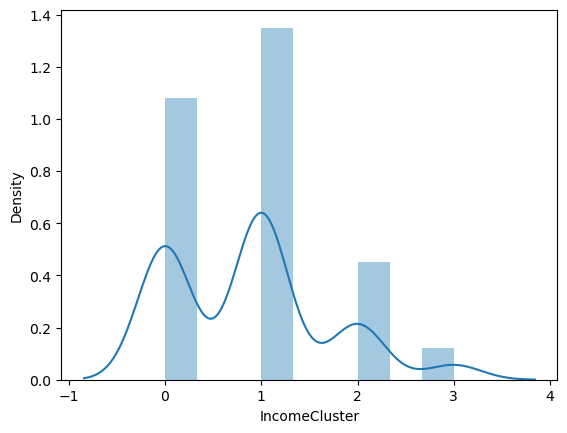

In [19]:
sns.distplot(df['IncomeCluster'])

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeCluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


#### Interprétation des données

* La majorité de la clientèle a des revenus bas ou moyens, avec une dominance de ceux qui on des revenus moyens: Clusters 0 et 1
* Les clients les plus nantis sont en minorité: Clusters 2 et 3

## Segmentation à partir de la variable 'Spending Score (1-100)'

In [21]:

df_score = df[['CustomerID','Spending Score (1-100)']]
df_score

,CustomerID,Spending Score (1-100)
0,1,39
1,2,81
2,3,6
3,4,77
4,5,40
...,...,...
195,196,79
196,197,28
197,198,74
198,199,18


In [22]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),IncomeCluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.870000
std,57.879185,13.969007,26.264721,25.823522,0.810174
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,3.000000


<Axes: ylabel='Spending Score (1-100)'>

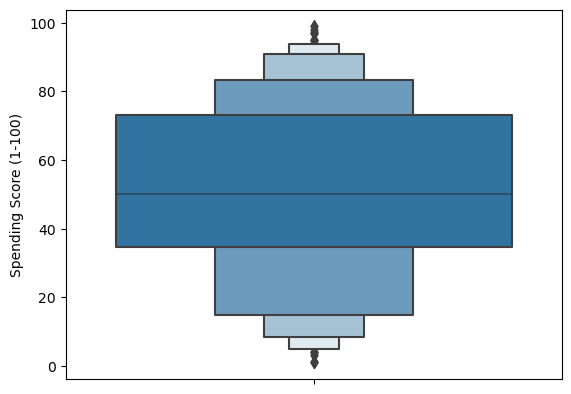

In [23]:
sns.boxenplot(y ='Spending Score (1-100)', data= df_score)

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

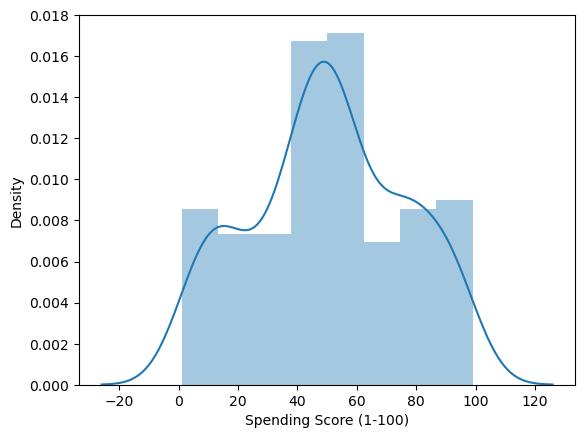

In [24]:
sns.distplot(df_score['Spending Score (1-100)'])

### Formation des clusters

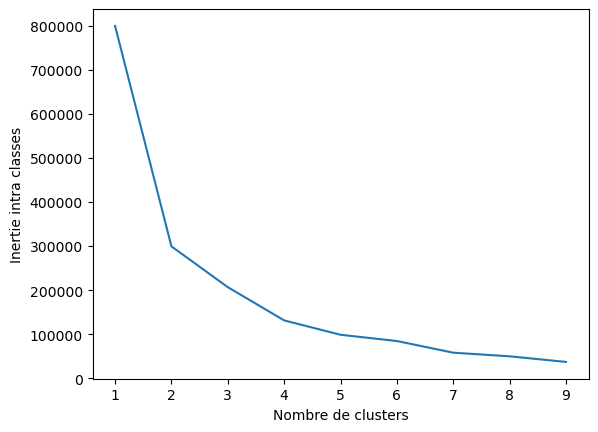

In [25]:
sse={}

for k in range(1,10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(df_score)
    df_score['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie intra classes")
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 4 , random_state = 0)
kmeans.fit(df[['Spending Score (1-100)']])
df['ScoreCluster'] = kmeans.predict(df[['Spending Score (1-100)']])

In [27]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[53.31746032]
 [82.35087719]
 [11.84615385]
 [37.19512195]]
[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 0 3 1 3 1 2 1 2 1 3 0 3 1 2 1 2 1 2 1 2
 1 3 1 3 1 3 0 3 0 0 0 3 3 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 3 0 0 3 3 0 0 0 0 0 0 0 3 0 3 3 0 0 0 3 0 3 0 0 0 0 3 0 0 3 0 0
 0 3 0 0 0 3 0 3 0 0 3 0 1 3 1 3 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 3 1
 2 1 2 1 2 1 2 1 2 1 2 1 3 1 2 1 3 1 2 1 3 0 2 1 2 1 2 1 2 1 2 1 3 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 3 1 2 1]


In [28]:
df = order_cluster('ScoreCluster','Spending Score (1-100)', df, True)

### Statistiques descriptives sur les score selon les clusters

In [29]:
df.groupby('ScoreCluster')['Spending Score (1-100)'].describe()

,count,mean,std,min,25%,50%,75%,max
ScoreCluster,,,,,,,,
0,39.0,11.846154,6.196512,1.0,6.0,13.0,16.0,24.0
1,41.0,37.195122,5.648980,26.0,34.0,40.0,42.0,45.0
2,63.0,53.317460,5.211109,46.0,49.0,53.0,57.0,66.0
3,57.0,82.350877,8.913255,68.0,75.0,81.0,90.0,99.0


#### Interprétation

* Les clusters 0 et 1 sont en minorité numérique et contien égalemen des clients dont le score des dépenses est plus faible (maximum de moins de 50)
* Les cluster 2 et 3 sont en majorité et contiennent les clients on un score minimum supérieur à 50. 50% des clients du cluster 3 renferme une clientèle don les scores avoisinent 90.

<Axes: xlabel='ScoreCluster', ylabel='Density'>

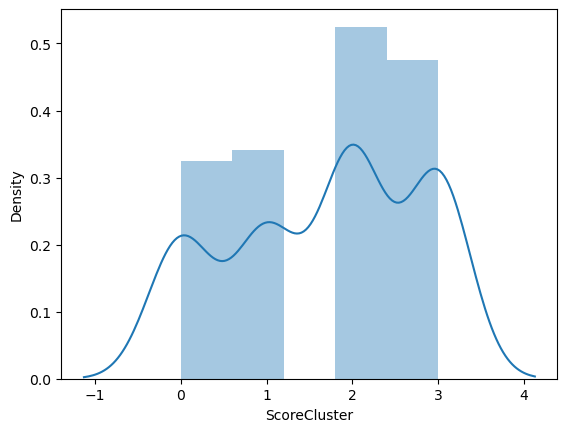

In [30]:
sns.distplot(df['ScoreCluster'])

In [31]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeCluster,ScoreCluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,1
5,6,Female,22,17,76,0,3
6,7,Female,35,18,6,0,0
7,8,Female,23,18,94,0,3
8,9,Male,64,19,3,0,0
9,10,Female,30,19,72,0,3


## Segmentation selon les âges

In [32]:
df_ages=df[['CustomerID', 'Age']]
df_ages

,CustomerID,Age
0,1,19
1,2,21
2,3,20
3,4,23
4,5,31
...,...,...
195,196,35
196,197,45
197,198,32
198,199,32


In [33]:
df_ages[['Age']].describe()

,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000


<Axes: ylabel='Age'>

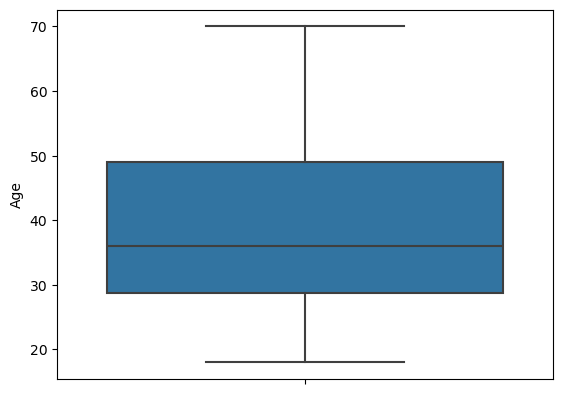

In [34]:
#sns.boxplot(y ='Age', data= df_ages)
sns.boxplot(y ='Age', data= df)


<Axes: xlabel='Age', ylabel='Density'>

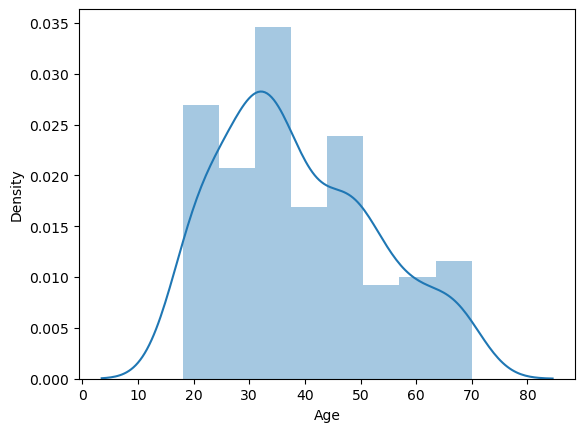

In [35]:
sns.distplot(df_ages['Age'])

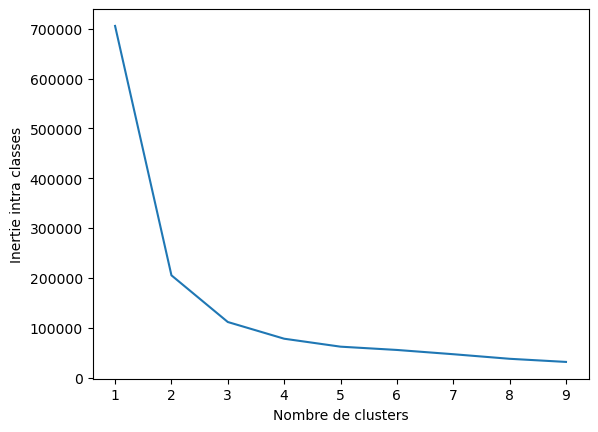

In [36]:
sse={}

for k in range(1,10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(df_ages)
    df_ages['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie intra classes")
plt.show()

In [37]:
kmeans = KMeans(n_clusters = 5 , random_state = 0)
kmeans.fit(df[['Age']])
df['AgeClusters'] = kmeans.predict(df[['Age']])

In [38]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[63.53571429]
 [30.        ]
 [49.18604651]
 [37.6       ]
 [21.15789474]]
[4 4 4 4 1 4 3 4 0 1 0 3 0 4 3 4 3 4 2 3 3 4 2 1 2 1 2 3 3 4 0 4 2 4 2 4 3
 1 3 4 0 4 2 1 2 4 2 1 1 1 2 1 1 0 2 2 2 0 1 2 0 4 0 2 0 4 3 0 4 1 0 2 0 0
 0 1 2 3 4 2 0 3 0 2 4 2 2 4 3 2 0 4 2 3 1 4 2 1 2 4 4 2 0 1 2 4 0 2 0 0 0
 4 3 4 4 4 0 2 2 2 1 3 3 3 4 1 3 3 0 3 2 3 4 1 4 1 2 1 4 3 0 1 1 1 4 1 2 1
 3 3 3 3 2 3 2 1 3 1 3 1 2 1 4 1 2 3 3 1 3 1 3 1 3 3 2 1 0 1 0 3 3 1 2 1 3
 1 2 1 3 3 3 1 1 3 2 3 2 1 1 1]


In [39]:
df = order_cluster('AgeClusters','Age', df, True)

### Statistiques descriptives sur les clusters des âges

In [40]:
df.groupby('AgeClusters')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
AgeClusters,,,,,,,,
0,38.0,21.157895,2.224268,18.0,19.00,21.0,23.0,25.0
1,46.0,30.000000,2.033060,26.0,28.25,30.0,32.0,33.0
2,45.0,37.600000,2.750207,34.0,35.00,37.0,40.0,43.0
3,43.0,49.186047,3.088040,44.0,47.00,49.0,51.0,56.0
4,28.0,63.535714,4.324625,57.0,59.00,64.5,67.0,70.0


#### Interprétation

 Les âges en 5 Clusters:
* 0- Les plus jeunes, de 18 à 25 ans.
* 1- Les adultes, de 26 à 33 ans. Ils son plus nombreux.
* 2- Les adultes (presque) quarentenaires, de 34 à 43 ans. Presque aussi nombreux que les précédents.
* 3- Les adultes (presque) Cinquantenaires. De 44 à 56 ans.
* 4- Les Séniors, de 57 à 70 ans. Ils sont en minorité.


<Axes: xlabel='AgeClusters', ylabel='Density'>

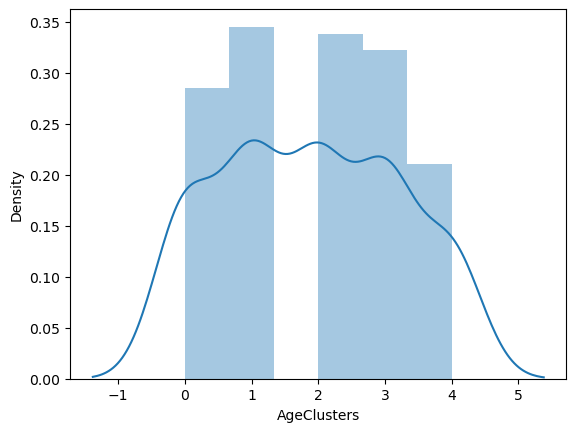

In [41]:
sns.distplot(df['AgeClusters'])

## Segmentation globale

In [42]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeCluster,ScoreCluster,AgeClusters
0,1,Male,19,15,39,0,1,0
1,2,Male,21,15,81,0,3,0
2,3,Female,20,16,6,0,0,0
3,4,Female,23,16,77,0,3,0
4,5,Female,31,17,40,0,1,1


### Créons un score global

#### Interprétation

Le score global se base sur les clusters de revenus, les clusters des scores de dépenses et les clusters des âges. 
L'idée est de créer des clusters qui tiennent compte de ces différentes variables pour créer des profils de client plus précis avec des indices bas et élevés. Ceci permettra enfin de les classer dans des segments différents selon leurs valeurs.

In [43]:
df['Global Score'] = df['IncomeCluster'] + df['ScoreCluster'] + df['AgeClusters']
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeCluster,ScoreCluster,AgeClusters,Global Score
0,1,Male,19,15,39,0,1,0,1
1,2,Male,21,15,81,0,3,0,3
2,3,Female,20,16,6,0,0,0,0
3,4,Female,23,16,77,0,3,0,3
4,5,Female,31,17,40,0,1,1,2


In [44]:
df.groupby('Global Score')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()

,Annual Income (k$),Spending Score (1-100),Age
Global Score,,,
0,16.000000,6.000000,20.000000
1,59.750000,16.500000,20.750000
2,45.705882,38.588235,25.529412
3,43.071429,50.642857,28.785714
4,57.083333,34.250000,41.388889
5,67.564103,55.615385,41.512821
6,71.465116,60.906977,47.069767
7,79.687500,62.125000,51.125000
8,116.500000,85.000000,36.500000


#### Interprétation

###### On remarque que les clusters sont rangés des plus faibles aux meilleurs. Nous utiliserons des termes en ergots pour faciliter la compréhension.

     0. Jeunes coulés
     1. Les chercheurs Niveau 1
     2. Les chercheurs Niveau 2
     3. Les voleurs (Ils dépensent en moyenne plus qu'ils ne gagnent en revenus)
     4. Les Stables Niveau 1
     5. Les Stables Niveau 2
     6. Les Debouts Niveau 1
     7. Les Debouts Niveau 2
     8. Les Suspendus (Les aigles)



In [47]:
df.groupby('Global Score')['Spending Score (1-100)'].count()

Global Score
0     1
1     4
2    17
3    42
4    36
5    39
6    43
7    16
8     2
Name: Spending Score (1-100), dtype: int64

#### Classification 
 
    - De 0 à 2 : Low Value
    - De 3 à 5 : Middle value
    - De 6 à 8 : High Value

In [50]:
df['Segment'] = 'Low Value'
df.loc[df['Global Score']>2,'Segment'] = 'Middle Value' 
df.loc[df['Global Score']>4,'Segment'] = 'High Value' 

In [51]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),IncomeCluster,ScoreCluster,AgeClusters,Global Score,Segment
0,1,Male,19,15,39,0,1,0,1,Low Value
1,2,Male,21,15,81,0,3,0,3,Middle Value
2,3,Female,20,16,6,0,0,0,0,Low Value
3,4,Female,23,16,77,0,3,0,3,Middle Value
4,5,Female,31,17,40,0,1,1,2,Low Value
...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,3,2,8,High Value
196,197,Female,45,126,28,3,1,3,7,High Value
197,198,Male,32,126,74,3,3,1,7,High Value
198,199,Male,32,137,18,3,0,1,4,Middle Value


#### Visualisation des Spending score en fonction des Annual Income

<Figure size 1200x500 with 0 Axes>

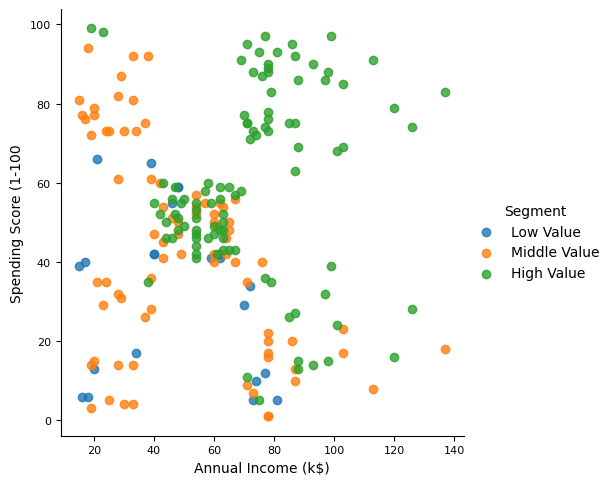

In [55]:
plt.figure(figsize=(12, 5))
graph = sns.lmplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)",  hue="Segment", fit_reg=False)
graph.set(xlabel="Annual Income (k$)", ylabel= 'Spending Score (1-100')
plt.tick_params(axis='both', which='major', labelsize=8)

#### Interprétation

* Low Value: Ils sont moins nombreux, dépensent très peu ou moyennement. Jeunes coulés, se cherchent ou ne peuvent pas se permettre d'avoir un comportement de dépensier sur une longue durée. C'est ce qui explique leur rareté dans les scores de dépenses et les revenus élevés
* Middle Value :  Plus nombreux, ils ont des revenus moyennement ou très élevés ou ils ont un score de dépense proche de la moyenne ou encore sont terme d'âge, de la catégorie de ceux qui peuvent statistiquement dépenser beaucoup. 
* High Value : Revenus élevés ou score de dépense élevés. Ils légèrement moins nombreux que les Middle Value, mais dépensent plus qu'eux.


  - Dans la catégorie des Middle Value et des High Value, on remarque un certain nombre de clients qui dépensent peu. Une Promotion ciblée sur ce segment de la clientèle peut favoriser une augmentation du score des dépenses. 

<Figure size 1200x500 with 0 Axes>

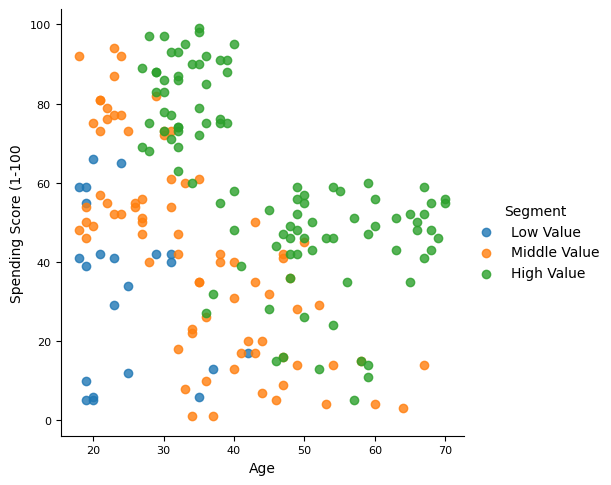

In [64]:
plt.figure(figsize=(12, 5))
graph = sns.lmplot(data=df, x="Age", y="Spending Score (1-100)",  hue="Segment", fit_reg=False)
graph.set(xlabel="Age", ylabel= 'Spending Score (1-100')
plt.tick_params(axis='both', which='major', labelsize=8)

#### Interprétation

Ici, nous pouvons confirmer que les clients : 
* Low Value ont des scores de dépense peu élevés et sont tous plus ou moins jeunes (Moins de 50 ans)
* Middle Value ont des scores de dépense bas ou élevés, mais sont en majorité âgés de 30 à près de 70 ans. Il existe curieusement dans ce segment, de jeunes de moins de 30 ans qui ont des scores de dépense élevés qui défient ceux des clients de la catégorie High value. C'est statistiquement probable que cela soit lié à leurs revenus.
* High Value ont en majorité plus de 30 ans, ont aussi en majorité des scores de dépense au dessus de la moyenne et proche du maximum.

  - La catégorie Middle Value est très inclusive. Une action business est nécessaire pour effectuer une différenciation plus contrastée.
    

In [57]:
df[['Segment']].value_counts()

Segment     
High Value      100
Middle Value     78
Low Value        22
Name: count, dtype: int64

In [58]:
df.describe(include = 'object')

,Gender,Segment
count,200,200
unique,2,3
top,Female,High Value
freq,112,100


## Suggestions

In [61]:
df.groupby('Segment')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Segment,,,
High Value,45.340000,72.160000,59.520000
Low Value,24.409091,46.909091,33.090909
Middle Value,34.602564,49.538462,43.076923


In [63]:
df.groupby('Gender')[['Annual Income (k$)','Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Gender,,
Female,59.250000,51.526786
Male,62.227273,48.511364


In [66]:
df.groupby('Gender')[['Segment']].value_counts()

Gender  Segment     
Female  High Value      56
        Middle Value    45
        Low Value       11
Male    High Value      44
        Middle Value    33
        Low Value       11
Name: count, dtype: int64

### Les stratégies suivantes sont recommandées pour augmenter considérablement les ventes :
* Low Value : Promouvoir les produits les plus consommés par les jeunes en vue d'augmenter leurs score de dépense
* Middle Value: Il s'agit de la catégorie la plus représentée qui souhaite sans doute dépenser autant pour de meilleurs produits. On peut donc penser à une promotion ciblée pour proposer des produits de meilleure qualité à des prix quasi égaux.
* High Value : Proposer des réductions sur le montant total d'achats pour tenter d'augmenter les scores de dépenses


  - Par ailleurs 
La clientèle féminine dépense en moyenne plus que celle masculine. Une promotion axée sur les produits du genre fera sans doute grimper les revenus. Penser également aux types de produits que les hommes offrent en cadeau aux femmes en ciblant la catégorie High Value peut favoriser de meilleurs résultats.

## Evaluation du clustering avec l'algorithme Silhoutte Score

L'évaluation du Clustering permet de vérifier si notre segmentation de la clientèle est statistiquement réussie.

Un score Proche de:
 * 1 indique un clustering de haute qualité avec des clusters à caractères bien différenciést
 * 0 indique une segmentation très peu différenciée et donc de faible qualité
 * -1 indique un clustering erronné avec des données dans des clusters incorrects


In [75]:
#Importation 
from sklearn.metrics import silhouette_score

#Implémentation
silhouette_score = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']], df['Segment'])

#Affichage
print('Silhouette Score :', silhouette_score)


Silhouette Score : 0.09087195761436584


Appliquoons l'algorithme StandardScaler pour essaer d'améliorer le Silhouette score en echelonnant nos Variables

In [77]:
#importation
from sklearn.preprocessing import StandardScaler

#Creation d'un objet StandardScaler
scaler = StandardScaler()

#Entrainement
scaled_features = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])

#Nouvel objet KMeans
kmeans = KMeans(n_clusters = 3, random_state = 42)

#Entrainement KMeans des données échelonnées
kmeans.fit(scaled_features)

#Asignons les indices de clusters à une nouvelle colonne
df['Scaled_Cluster'] = kmeans.labels_

In [82]:
df.groupby('Scaled_Cluster')[['Spending Score (1-100)']].describe()

Spending Score (1-100)                                     \
                                count       mean        std   min    25%   
Scaled_Cluster                                                             
0                                96.0  33.343750  17.734788   1.0  15.75   
1                                41.0  79.975610  13.997299  18.0  74.00   
2                                63.0  56.507937  21.572737   5.0  42.00   

                                  
                 50%   75%   max  
Scaled_Cluster                    
0               37.5  48.0  60.0  
1               83.0  90.0  97.0  
2               55.0  73.0  99.0

In [83]:
df.groupby('Scaled_Cluster')[['Annual Income (k$)']].describe()

Annual Income (k$)                                          \
                            count       mean        std   min   25%   50%   
Scaled_Cluster                                                              
0                            96.0  60.468750  23.704298  18.0  44.0  60.0   
1                            41.0  87.341463  17.985563  69.0  75.0  79.0   
2                            63.0  43.269841  19.141415  15.0  24.5  42.0   

                              
                  75%    max  
Scaled_Cluster                
0               77.25  126.0  
1               97.00  137.0  
2               60.00   81.0